In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [3]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

In [4]:
# Check data types and missing values
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB
None


In [5]:
# Check dataset shape and first rows
print(f"Dataset contains {train_df.shape[0]} rows and {train_df.shape[1]} columns.")
train_df.head()

Dataset contains 2190 rows and 13 columns.


id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0

In [6]:
# Get statistical summary
train_df.describe()

id          day     pressure      maxtemp  temparature  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean   1094.500000   179.948402  1013.602146    26.365799    23.953059   
std     632.342866   105.203592     5.655366     5.654330     5.222410   
min       0.000000     1.000000   999.000000    10.400000     7.400000   
25%     547.250000    89.000000  1008.600000    21.300000    19.300000   
50%    1094.500000   178.500000  1013.000000    27.800000    25.500000   
75%    1641.750000   270.000000  1017.775000    31.200000    28.400000   
max    2189.000000   365.000000  1034.600000    36.000000    31.500000   

           mintemp     dewpoint     humidity        cloud     sunshine  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean     22.170091    20.454566    82.036530    75.721918     3.744429   
std       5.059120     5.288406     7.800654    18.026498     3.626327   
min       4.000000    -0.300000    39.000000     2.000000     0.000000   
25%      17.700000    16.800000    77.000000    69.000000     0.400000   
50%      23.850000    22.150000    82.000000    83.000000     2.400000   
75%      26.400000    25.000000    88.000000    88.000000     6.800000   
max      29.800000    26.700000    98.000000   100.000000    12.100000   

       winddirection    windspeed     rainfall  
count    2190.000000  2190.000000  2190.000000  
mean      104.863151    21.804703     0.753425  
std        80.002416     9.898659     0.431116  
min        10.000000     4.400000     0.000000  
25%        40.000000    14.125000     1.000000  
50%        70.000000    20.500000     1.000000  
75%       200.000000    27.900000     1.000000  
max       300.000000    59.500000     1.000000

In [7]:
# Save 'id' column for submission
test_ids = test_df['id']

# Define the target column
target_column = "rainfall"

# Select categorical and numerical columns (initial)
numerical_columns = [col for col in train_df.columns if col != "rainfall"]

# Print out column information
print("Target Column:", target_column)
print("\nNumerical Columns:", numerical_columns)

Target Column: rainfall

Numerical Columns: ['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


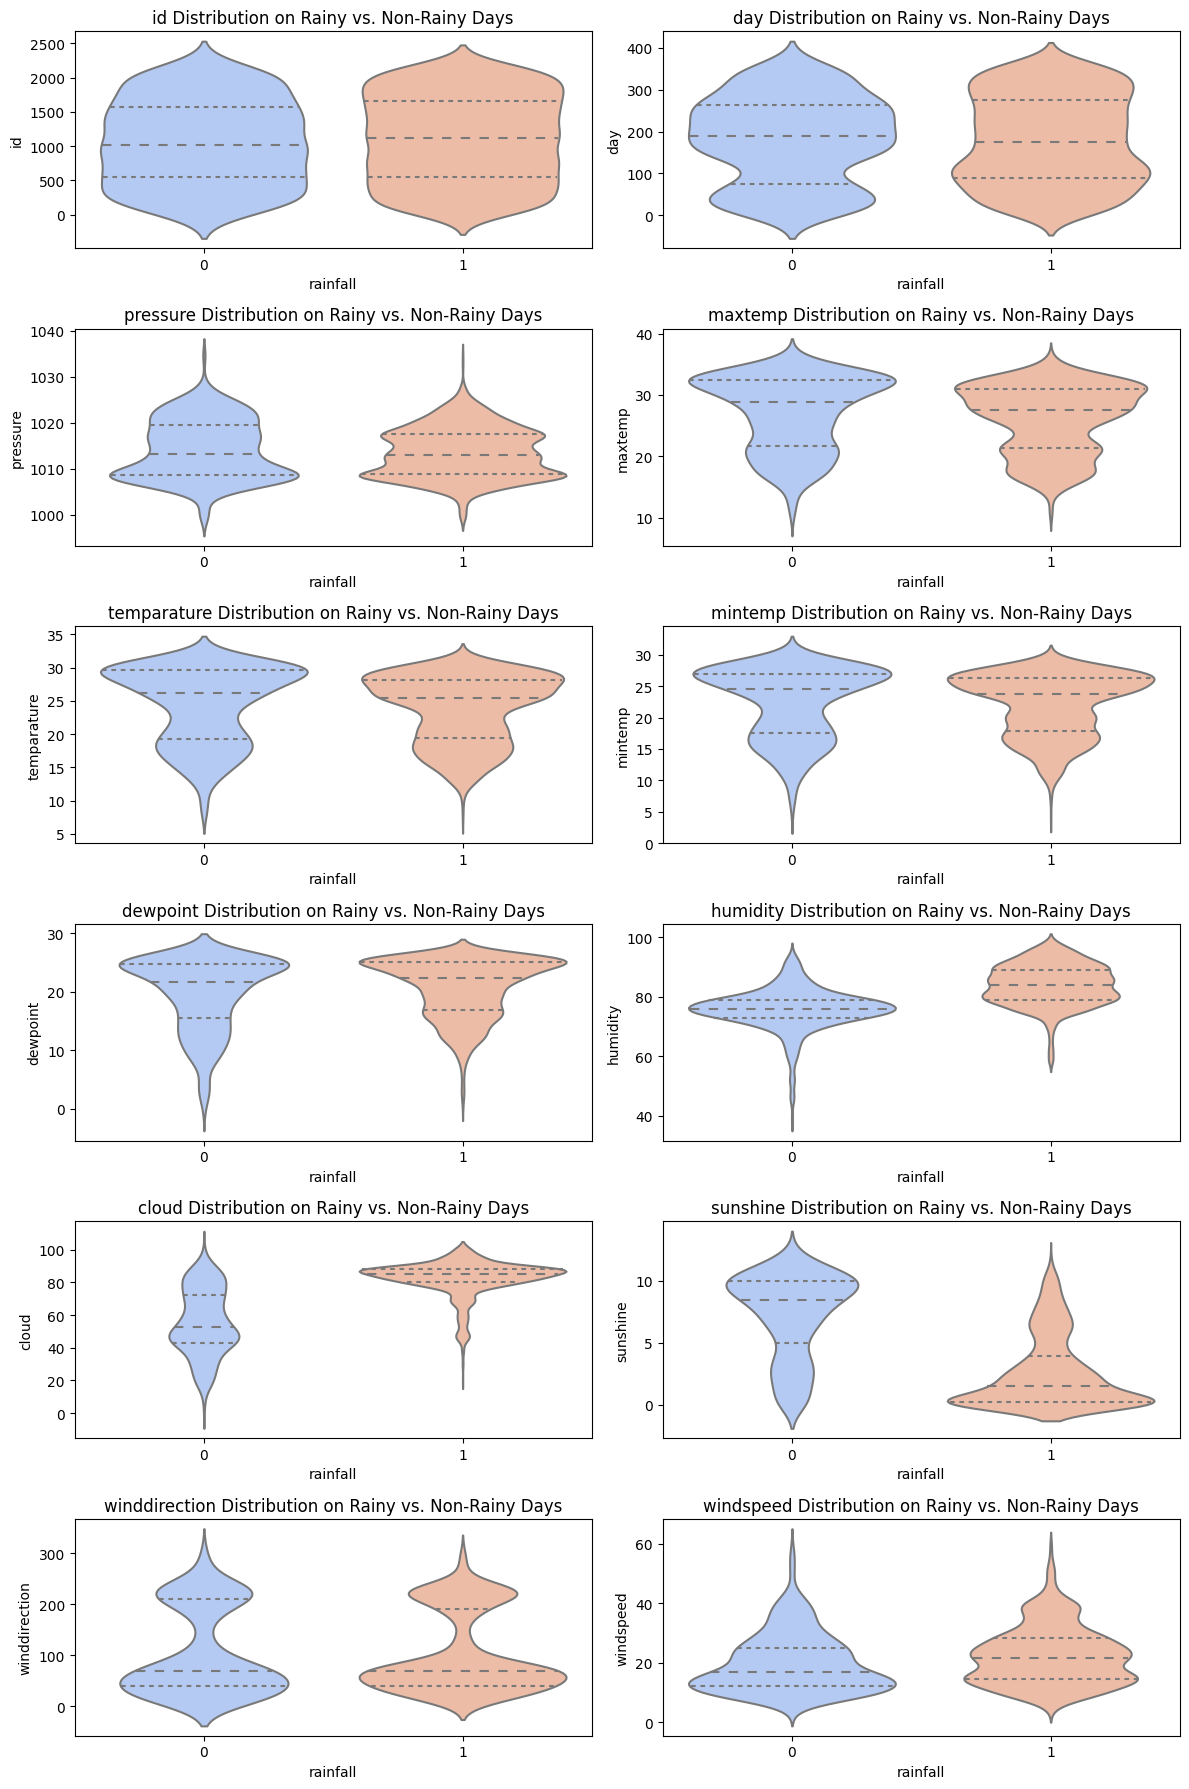

In [8]:
# Dynamically calculate number of rows & columns
num_vars = len(numerical_columns)
num_cols = 2  # Keep 2 columns for readability
num_rows = math.ceil(num_vars / num_cols)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot violin plots
for i, var in enumerate(numerical_columns):
    sns.violinplot(x=train_df[target_column], y=train_df[var], palette="coolwarm", inner="quartile", ax=axes[i])
    axes[i].set_title(f"{var} Distribution on Rainy vs. Non-Rainy Days")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

plt.tight_layout()
plt.show()

## 🌧️ Violin Plot Analysis: Rainy vs. Non-Rainy Days  

### **Key Observations**  

✅ **Pressure & Humidity**  
- Lower **pressure** and higher **humidity** strongly correlate with rainfall.  

✅ **Temperature & Dew Point**  
- **Temperature alone** is not a strong predictor, but **dew point** shows clearer separation.  

✅ **Sunshine & Cloud Cover**  
- **Sunshine drops significantly** on rainy days.  
- **Cloud cover** is one of the **strongest predictors** of rainfall.  

✅ **Wind Speed & Wind Direction**  
- **Higher wind variability** on rainy days, suggesting **storm-driven winds**.  
- **Bimodal wind direction**, indicating distinct weather regimes.  

✅ **Day (Time Effect)**  
- **Non-uniform distribution**, suggesting **seasonality** in rainfall patterns.  

✅ **ID (Index Feature)**  
- **No predictive power**, should be removed from modeling.  

### 🚀 **Next Steps**  
- Perform **time-series decomposition** to analyze **seasonal rainfall trends**.  

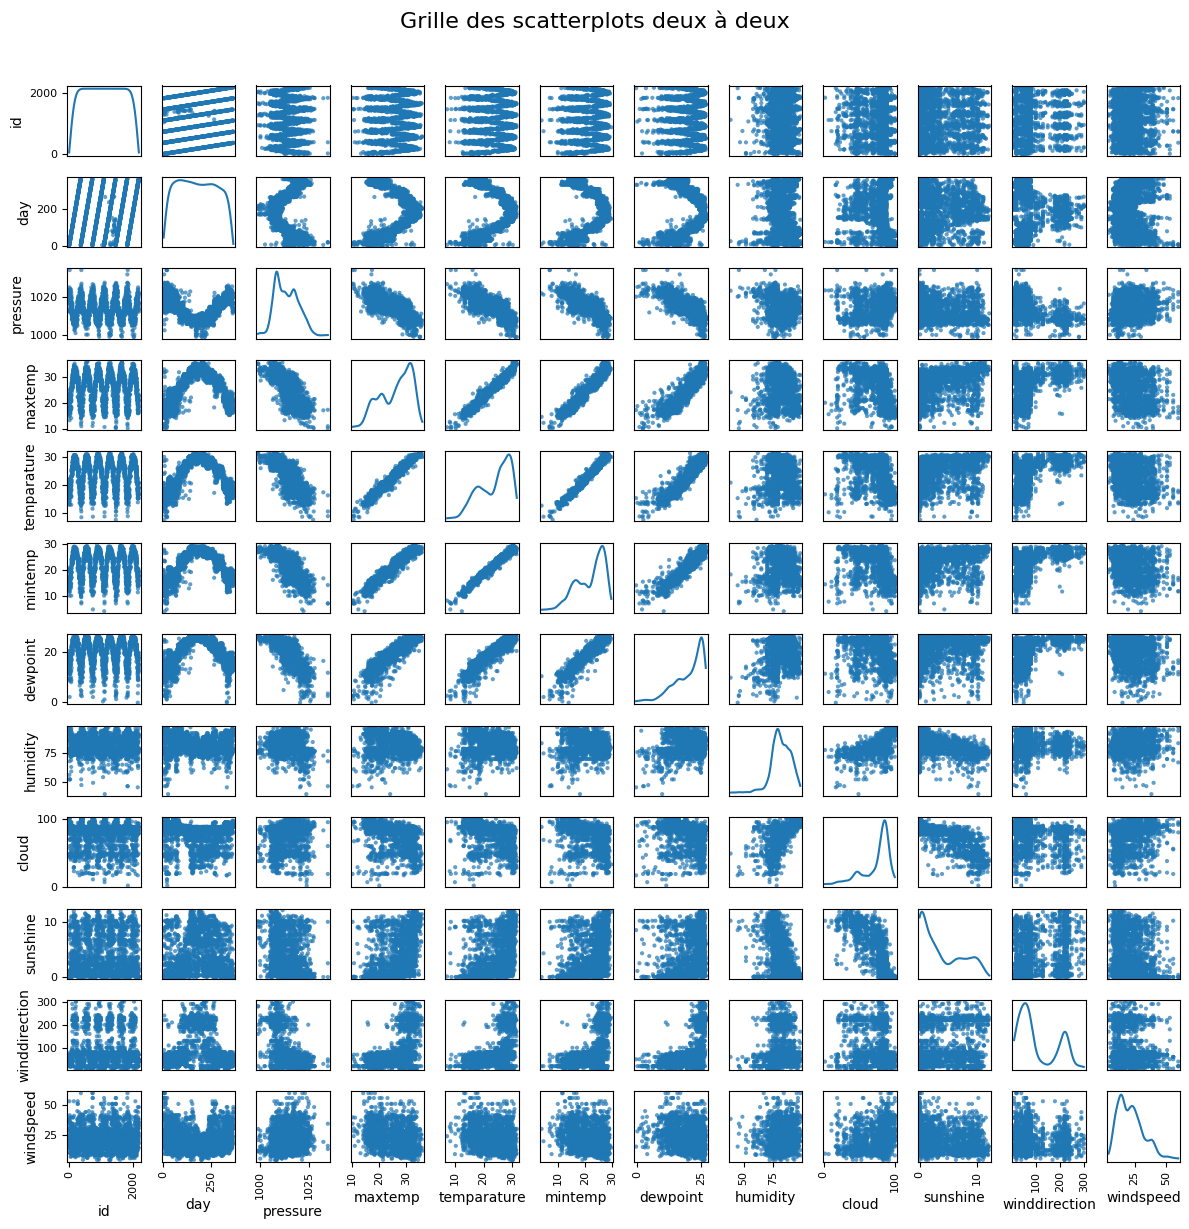

In [9]:
# Grille des scatterplots deux à deux pour visualiser les corrélations
pd.plotting.scatter_matrix(train_df[numerical_columns], figsize=(12, 12), diagonal='kde', alpha=0.7)

# Ajouter un titre général à la grille
plt.suptitle("Grille des scatterplots deux à deux", fontsize=16, y=1.02)

# Afficher le graphique
plt.tight_layout()
plt.show()

In [10]:
def detect_outliers_iqr(df, column):
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]

# Checking for outliers in each variable
outlier_counts = {var: len(detect_outliers_iqr(train_df, var)) for var in numerical_columns}
print(outlier_counts)

{'id': 0, 'day': 0, 'pressure': 4, 'maxtemp': 0, 'temparature': 0, 'mintemp': 1, 'dewpoint': 26, 'humidity': 28, 'cloud': 129, 'sunshine': 0, 'winddirection': 0, 'windspeed': 28}


In [11]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Estimate an automatic contamination level using percentiles
estimated_contamination = np.mean([
    len(detect_outliers_iqr(train_df, col)) / len(train_df) for col in numerical_columns
])

# Train Isolation Forest with dynamic contamination
iso_forest = IsolationForest(contamination=estimated_contamination, random_state=42)
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

print(f"Estimated Contamination Rate: {estimated_contamination:.4f}")

Estimated Contamination Rate: 0.0082


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [12]:
# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [13]:
# Step 1: Detect IQR-based outliers across all numerical features
iqr_outliers = set()
for var in numerical_columns:
    iqr_outliers.update(detect_outliers_iqr(train_df, var).index)

# Step 2: Detect Isolation Forest anomalies
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

# Step 3: Compare IQR outliers and Isolation Forest anomalies
iso_outliers = set(train_df[train_df["anomaly"] == -1].index)

# Step 4: Find common and unique outliers
common_outliers = iqr_outliers.intersection(iso_outliers)
only_iqr_outliers = iqr_outliers - iso_outliers
only_iso_outliers = iso_outliers - iqr_outliers

# Step 5: Print results
print(f"Total IQR Outliers: {len(iqr_outliers)}")
print(f"Total Isolation Forest Outliers: {len(iso_outliers)}")
print(f"Common Outliers: {len(common_outliers)}")
print(f"Outliers detected **only** by IQR: {len(only_iqr_outliers)}")
print(f"Outliers detected **only** by Isolation Forest: {len(only_iso_outliers)}")


Total IQR Outliers: 194
Total Isolation Forest Outliers: 110
Common Outliers: 72
Outliers detected **only** by IQR: 122
Outliers detected **only** by Isolation Forest: 38


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


✅ Most IQR outliers may just be extreme values in one variable (not necessarily "weird" when considering multiple variables).

✅ Isolation Forest is likely detecting more "real-world" anomalies that result from unusual feature interactions (e.g., temperature & humidity behaving unexpectedly together).

✅ 72 common outliers confirm that some extreme values are also multivariate anomalies, reinforcing their likelihood as true anomalies.

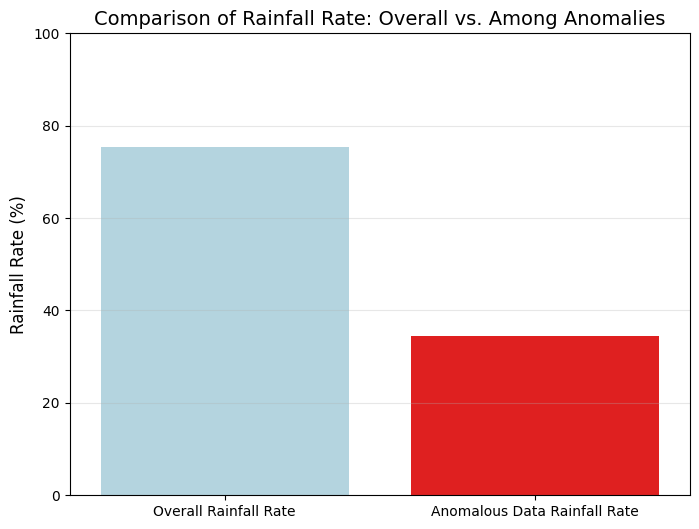

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute overall rainfall rate
global_rainfall_rate = train_df["rainfall"].mean() * 100  # Convert to percentage

# Compute rainfall rate among anomalies
anomaly_rainfall_rate = train_df[train_df["anomaly"] == -1]["rainfall"].mean() * 100  # Convert to percentage

# Create a DataFrame for visualization
rainfall_comparison = pd.DataFrame({
    "Category": ["Overall Rainfall Rate", "Anomalous Data Rainfall Rate"],
    "Rainfall Rate (%)": [global_rainfall_rate, anomaly_rainfall_rate]
})

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=rainfall_comparison, x="Category", y="Rainfall Rate (%)", palette=["lightblue", "red"])


# Formatting
plt.title("Comparison of Rainfall Rate: Overall vs. Among Anomalies", fontsize=14)
plt.ylabel("Rainfall Rate (%)", fontsize=12)
plt.xlabel("")
plt.ylim(0, 100)  # Ensure the scale is percentage-based
plt.grid(axis="y", alpha=0.3)

# Show plot
plt.show()


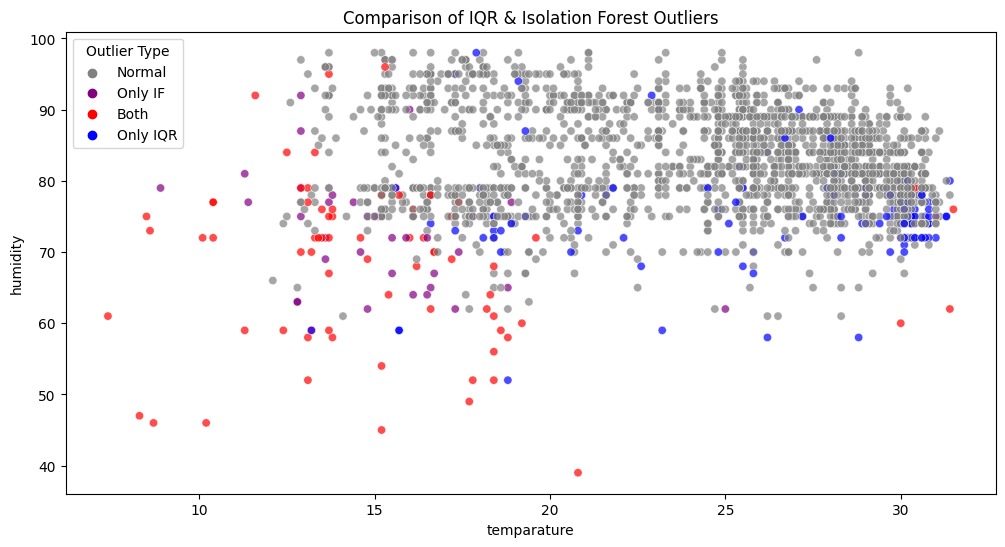

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["temparature"], y=train_df["humidity"], 
    hue=train_df.index.map(lambda idx: 
        "Both" if idx in common_outliers else 
        "Only IQR" if idx in only_iqr_outliers else 
        "Only IF" if idx in only_iso_outliers else "Normal"),
    palette={"Both": "red", "Only IQR": "blue", "Only IF": "purple", "Normal": "gray"},
    alpha=0.7
)
plt.title("Comparison of IQR & Isolation Forest Outliers")
plt.legend(title="Outlier Type")
plt.show()

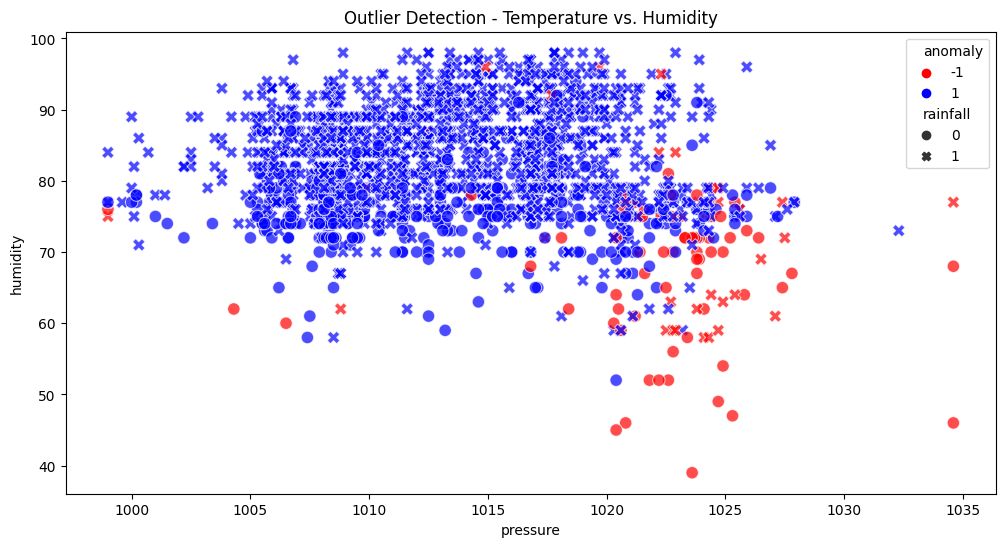

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["pressure"], 
    y=train_df["humidity"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - Temperature vs. Humidity")
plt.show()

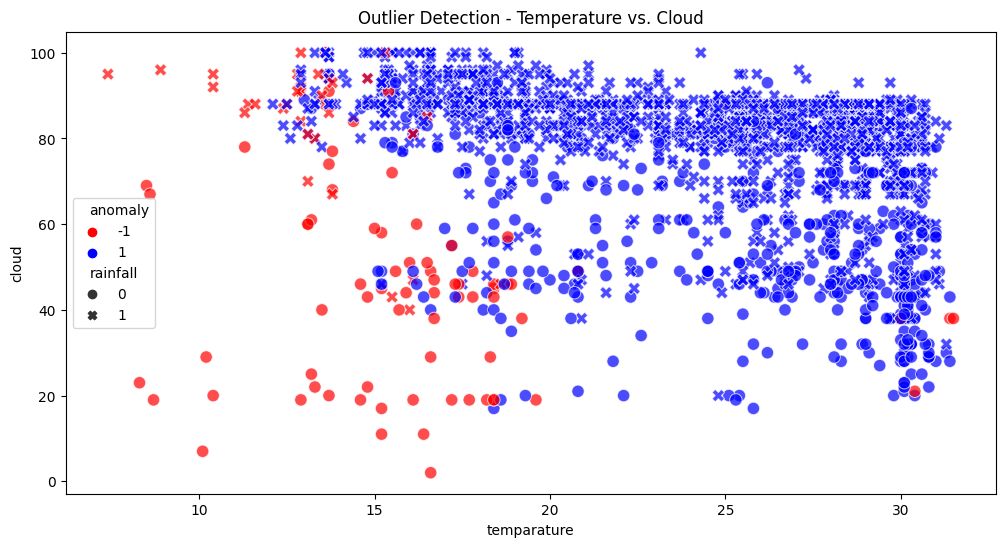

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["temparature"], 
    y=train_df["cloud"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - Temperature vs. Cloud")
plt.show()

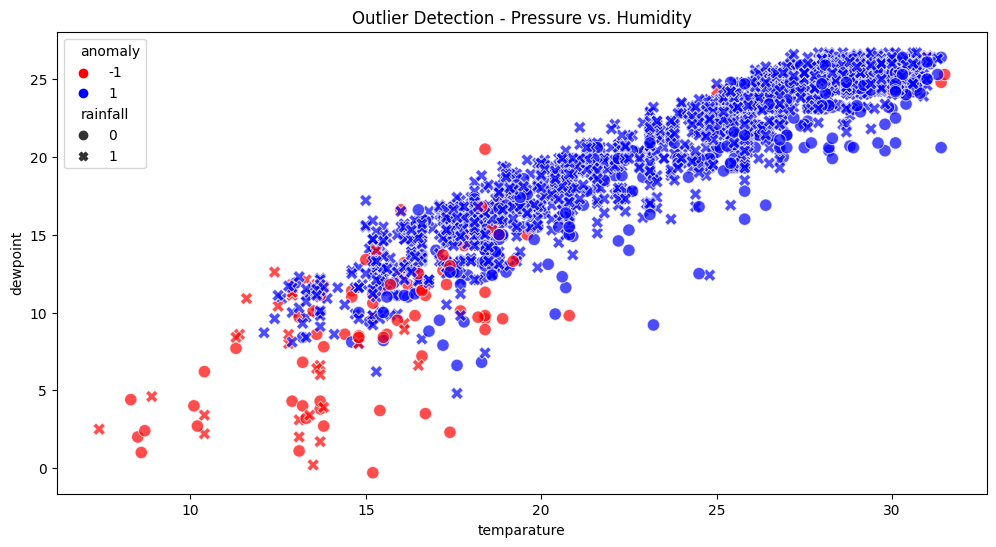

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["temparature"], 
    y=train_df["dewpoint"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - Pressure vs. Humidity")
plt.show()

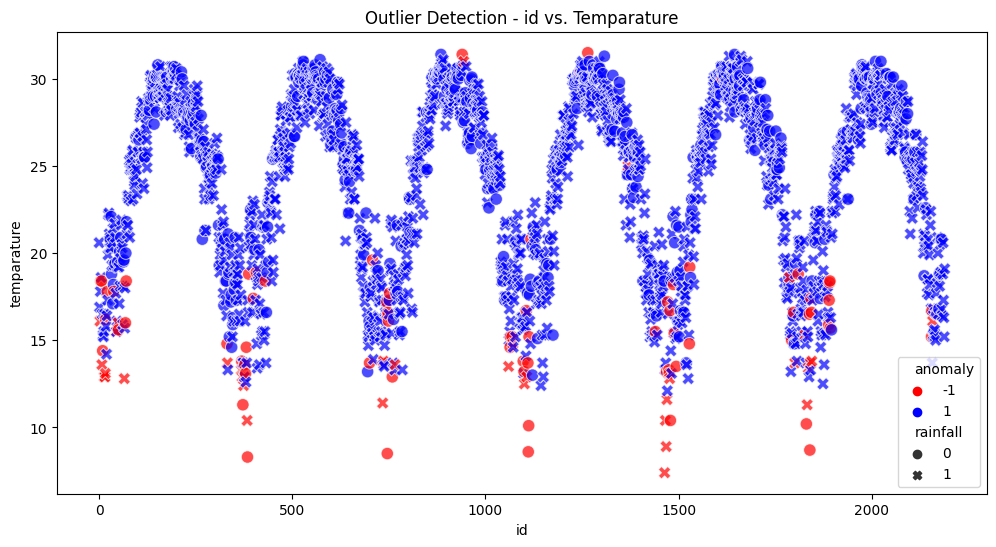

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=train_df["id"], 
    y=train_df["temparature"], 
    hue=train_df["anomaly"], 
    style=train_df["rainfall"], 
    palette={1: "blue", -1: "red"}, 
    s=80, 
    alpha=0.7
)
plt.title("Outlier Detection - id vs. Temparature")
plt.show()

✅ Outliers are clustered together, it suggests a systematic pattern rather than random anomalies. This could indicate:

- A specific weather phenomenon (e.g., a seasonal storm pattern or an unusual heatwave).
- Sensor errors or bias (e.g., faulty temperature readings always appearing in the same range).
- A distinct data distribution (e.g., a particular climate period that is rare but not necessarily anomalous).

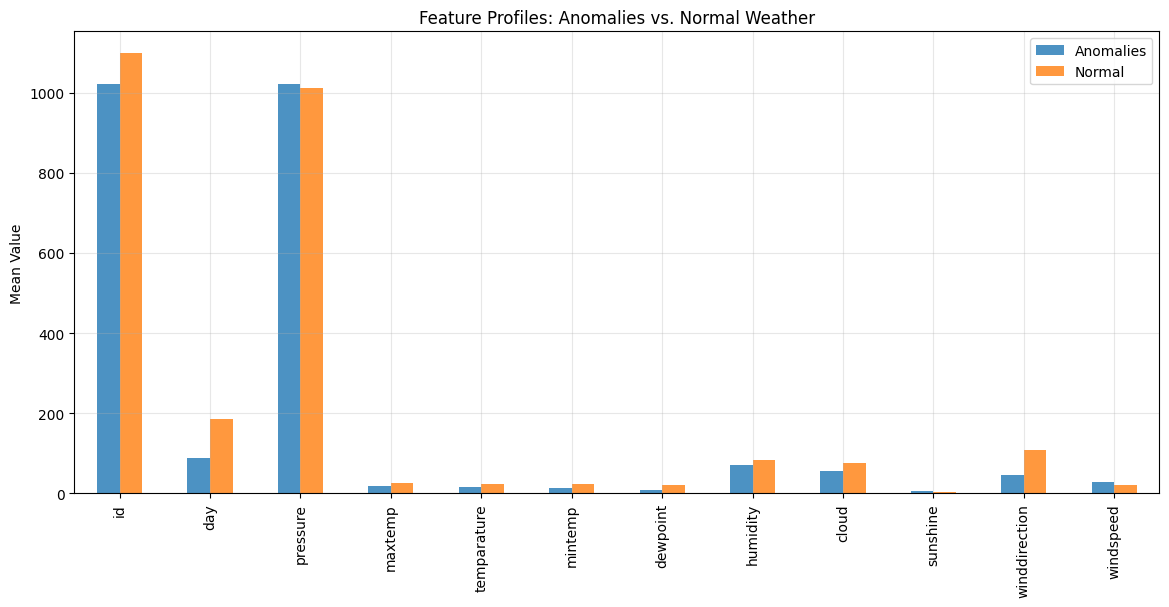

In [20]:
# Mean weather conditions among anomalies
anomaly_profile = train_df[train_df["anomaly"] == -1][numerical_columns].mean()
normal_profile = train_df[train_df["anomaly"] == 1][numerical_columns].mean()

comparison = pd.DataFrame({
    "Anomalies": anomaly_profile,
    "Normal": normal_profile
})

comparison.plot(kind="bar", figsize=(14, 6), alpha=0.8)
plt.title("Feature Profiles: Anomalies vs. Normal Weather")
plt.ylabel("Mean Value")
plt.grid(alpha=0.3)
plt.show()


In [21]:
from scipy.stats import ks_2samp

# Sélection des deux groupes à comparer
rainy_days = train_df[train_df["rainfall"] == 1]
suspicious_dry_days = train_df[(train_df["anomaly"] == -1) & (train_df["rainfall"] == 0)]

# Appliquer le KS-test à chaque variable
ks_results = {}
for var in numerical_columns:
    stat, p_value = ks_2samp(rainy_days[var], suspicious_dry_days[var])
    ks_results[var] = {"KS_stat": stat, "p_value": p_value}

# Résultats triés par similarité (p-value décroissante)
import pandas as pd
ks_df = pd.DataFrame(ks_results).T.sort_values("p_value", ascending=False)
print(ks_df)


                KS_stat       p_value
id             0.114040  3.065216e-01
windspeed      0.189192  1.229110e-02
winddirection  0.485808  1.740644e-15
day            0.586263  5.436231e-23
maxtemp        0.592929  1.470544e-23
sunshine       0.658586  1.038485e-29
temparature    0.676667  1.386389e-31
mintemp        0.684495  2.012146e-32
dewpoint       0.737374  1.214201e-38
humidity       0.747475  6.306239e-40
pressure       0.755000  6.408901e-41
cloud          0.777980  4.238191e-44


## 🔬 Statistical Comparison: Rainy Days vs. Dry Anomalies

We performed a two-sample **Kolmogorov-Smirnov test** to compare each weather variable between:
- 🌧️ **Rainy days** (`rainfall = 1`)
- 🔴 **Anomalies without rain** (`anomaly = -1` & `rainfall = 0`)

### ✅ Key Insights

- **Only `id` showed no significant difference** (p = 0.31), which is expected since it's not meteorological.
- All **weather-related features** (e.g., temperature, pressure, humidity, dew point) showed **very significant differences** (p ≪ 0.05).
- The most different variables were:
  - `cloud`, `pressure`, `humidity`, `dewpoint`, `mintemp`, `temperature`, `sunshine`
- These results suggest that **dry anomalies do not statistically resemble rainy days** across most meteorological dimensions.

### ⚠️ Conclusion

Although the **intuition was good**, the statistical evidence shows that the **dry anomalies behave very differently** from typical rainy days. They are **not "missed rain events"**, but rather **outliers due to other rare conditions**.

> Want to explore what makes them unique instead? A clustering approach (e.g., DBSCAN or t-SNE) could help.


In [22]:


# Drop 'id' before processing
numerical_columns = [col for col in numerical_columns if col != "id"]

# Select only anomalies
anomalies_df = train_df[train_df["anomaly"] == -1][numerical_columns]

# Normalize features
scaler = StandardScaler()
anomalies_scaled = scaler.fit_transform(anomalies_df)

print(f"Remaining features: {numerical_columns}")

Remaining features: ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']


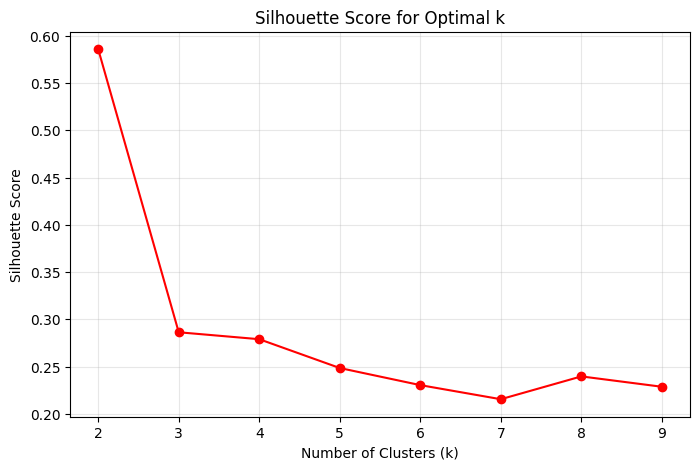

In [23]:

sil_scores = []
k_range = range(2, 10)  # Start from 2 because silhouette score needs at least 2 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(anomalies_scaled)
    score = silhouette_score(anomalies_scaled, labels)
    sil_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker="o", linestyle="-", color="r")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.xticks(k_range)
plt.grid(alpha=0.3)
plt.show()


In [24]:

# Train K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
anomalies_df["kmeans_cluster"] = kmeans.fit_predict(anomalies_scaled)  # ✅ Correct

# Now proceed with analysis
print(anomalies_df["kmeans_cluster"].value_counts())  # Check cluster sizes


kmeans_cluster
0    64
1    40
2     6
Name: count, dtype: int64


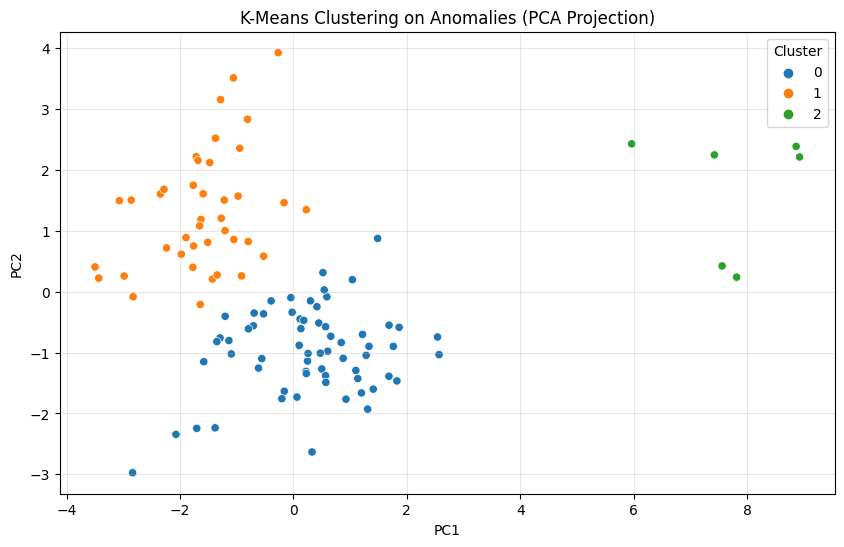

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
anomalies_2d = pca.fit_transform(anomalies_scaled)

# Add PCA results to dataframe
anomalies_df["PC1"] = anomalies_2d[:, 0]
anomalies_df["PC2"] = anomalies_2d[:, 1]

# Plot K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=anomalies_df, x="PC1", y="PC2", hue="kmeans_cluster", palette="tab10")
plt.title("K-Means Clustering on Anomalies (PCA Projection)")
plt.legend(title="Cluster")
plt.grid(alpha=0.3)
plt.show()


📌 What This Means :

1️⃣ Anomalies are not all the same → There are at least two types of abnormal weather conditions detected by DBSCAN.

2️⃣ Some anomalies (Cluster 1) are very different from the rest, suggesting a unique weather event.

3️⃣ A few extreme points remain isolated (-1), meaning they are true one-off events.

In [26]:
cluster_profiles = anomalies_df.groupby("kmeans_cluster")[numerical_columns].mean()
print(cluster_profiles)


                     day     pressure    maxtemp  temparature    mintemp  \
kmeans_cluster                                                             
0                92.5625  1022.987500  18.518750    15.729688  13.595313   
1                62.3000  1023.155000  14.882500    12.855000  10.845000   
2               196.5000  1004.566667  33.483333    29.883333  27.316667   

                 dewpoint   humidity      cloud  sunshine  winddirection  \
kmeans_cluster                                                             
0                9.707812  66.640625  38.656250  8.689063      34.687500   
1                7.312500  75.050000  86.950000  0.872500      35.000000   
2               25.216667  69.000000  46.666667  9.783333     223.333333   

                windspeed  
kmeans_cluster             
0               24.217188  
1               33.337500  
2               27.166667  


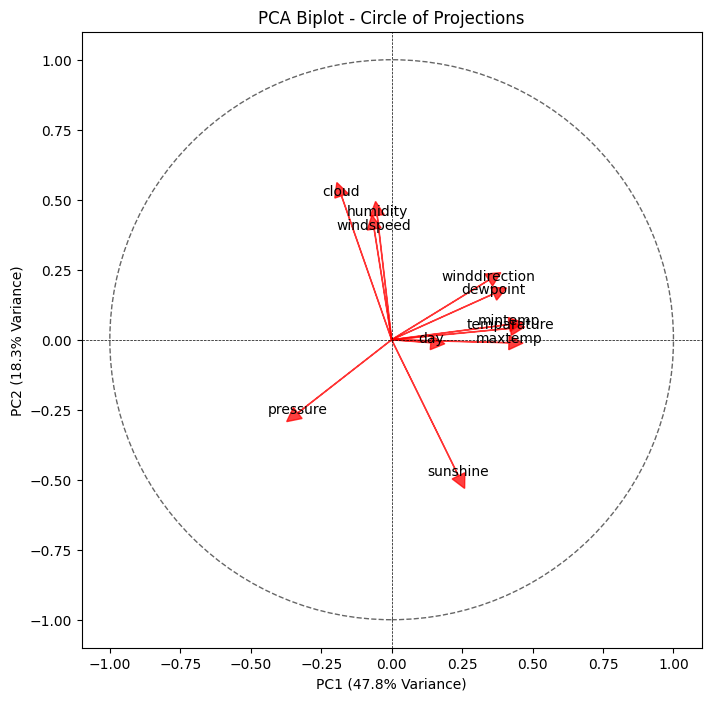

In [27]:


# Standardize the anomaly dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(anomalies_df[numerical_columns])  # Use your numerical columns

# Perform PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the circle of projections
fig, ax = plt.subplots(figsize=(8, 8))

# Draw unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle="dashed", alpha=0.6)
ax.add_artist(circle)

# Plot arrows for each feature
for i, feature in enumerate(numerical_columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i],
              head_width=0.05, head_length=0.05, color='r', alpha=0.75)
    plt.text(pca.components_[0, i], pca.components_[1, i], feature, color='black', ha='center', fontsize=10)

# Labels and formatting
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.5, linestyle="dashed")
plt.axvline(0, color='black', linewidth=0.5, linestyle="dashed")
plt.title("PCA Biplot - Circle of Projections")
plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}% Variance)")

plt.show()


<Figure size 1400x800 with 0 Axes>

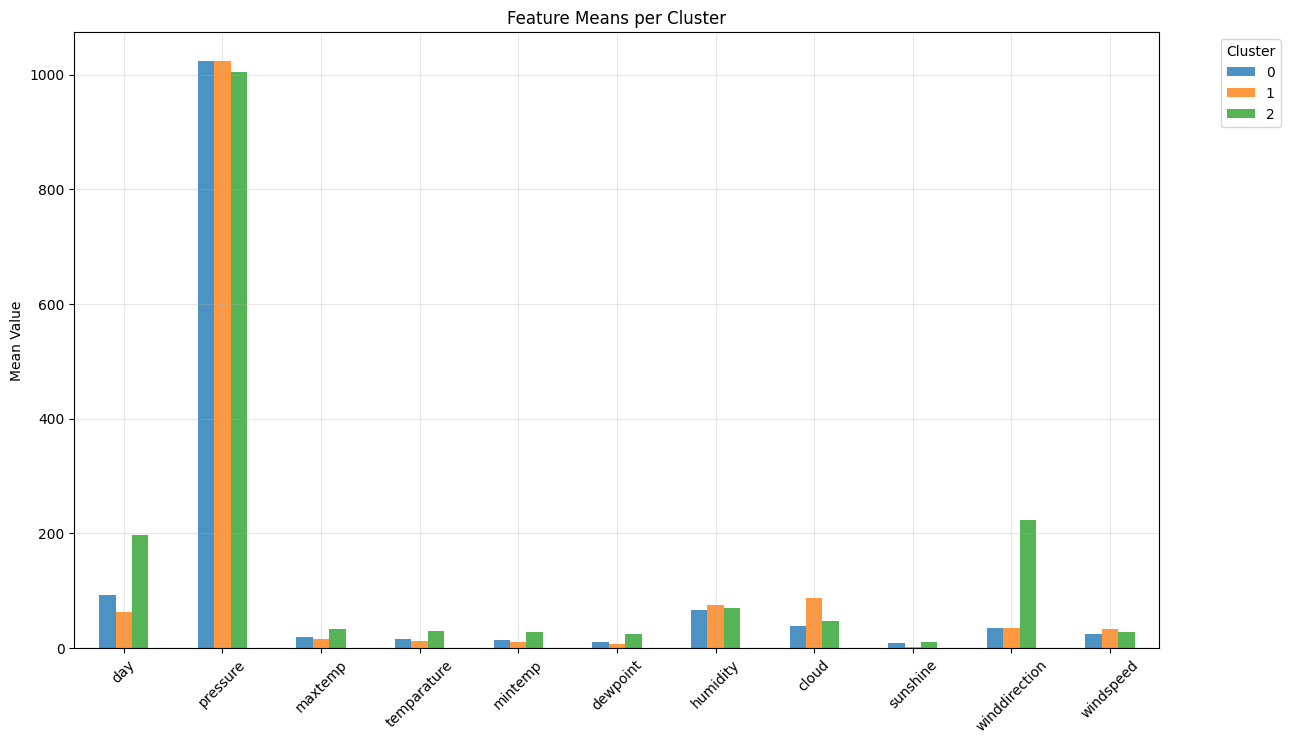

In [28]:
import matplotlib.pyplot as plt

# Compute cluster profiles
cluster_profiles = anomalies_df.groupby("kmeans_cluster")[numerical_columns].mean()

# Transpose for plotting
cluster_profiles_transposed = cluster_profiles.T

# Plot
plt.figure(figsize=(14, 8))
cluster_profiles_transposed.plot(kind="bar", figsize=(14, 8), alpha=0.8)
plt.title("Feature Means per Cluster")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [29]:

# Prepare training data
X = train_df[numerical_columns]
y = train_df["rainfall"]  # Target: Rain or No Rain

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.84


In [30]:
# Add anomaly labels as a new feature
train_df["anomaly"] = iso_forest.fit_predict(train_df[numerical_columns])

# Prepare training data with anomaly feature
X = train_df[numerical_columns + ["anomaly"]]  # Include anomaly as a feature
y = train_df["rainfall"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy (with anomalies): {accuracy:.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Model Accuracy (with anomalies): 0.85


In [31]:
# Remove anomalies from training
clean_train_df = train_df[train_df["anomaly"] == 1]

# Prepare training data
X_clean = clean_train_df[numerical_columns]
y_clean = clean_train_df["rainfall"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy (without anomalies): {accuracy:.2f}")

Model Accuracy (without anomalies): 0.87


Estimated Parameters: α=0.025, β=0.001, δ=-0.002, λ=-0.003, γ=2.000
Shape of t_eval: (2190,), Shape of simulated_rainfall: (1,)
First 10 values of simulated_rainfall: [1.]


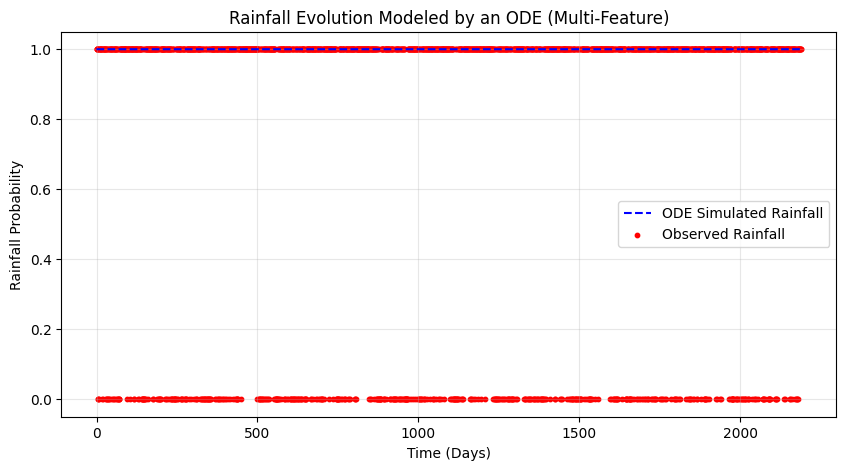

In [32]:



# Define the improved differential equation with logistic constraint
def rainfall_dynamics(t, R, alpha, beta, delta, lam, gamma, humidity_interp, pressure_interp, temp_interp, wind_interp):
    humidity = humidity_interp(t)
    pressure = pressure_interp(t)
    temperature = temp_interp(t)
    windspeed = wind_interp(t)

    # Logistic constraint ensures rain probability remains in [0, 1]
    return alpha * humidity - beta * pressure + delta * temperature - lam * windspeed - gamma * R * (1 - R)

# Extract meteorological variables
humidity = train_df["humidity"].values
pressure = train_df["pressure"].values
temperature = train_df["temparature"].values  # Make sure this is the correct column name
windspeed = train_df["windspeed"].values
rainfall = train_df["rainfall"].values  # 0 or 1

# Fit parameters using regression
def fit_model(hptw, alpha, beta, delta, lam):
    return alpha * hptw[:, 0] - beta * hptw[:, 1] + delta * hptw[:, 2] - lam * hptw[:, 3]

params, _ = curve_fit(fit_model, np.column_stack((humidity, pressure, temperature, windspeed)), rainfall)

# Extract optimized parameters
alpha_opt, beta_opt, delta_opt, lam_opt = params
gamma_opt = 2.0  # A higher gamma to enforce logistic stabilization

print(f"Estimated Parameters: α={alpha_opt:.3f}, β={beta_opt:.3f}, δ={delta_opt:.3f}, λ={lam_opt:.3f}, γ={gamma_opt:.3f}")

# Create interpolation functions for each feature
t_values = np.arange(len(humidity))
humidity_interp = interp1d(t_values, humidity, kind="linear", fill_value="extrapolate")
pressure_interp = interp1d(t_values, pressure, kind="linear", fill_value="extrapolate")
temp_interp = interp1d(t_values, temperature, kind="linear", fill_value="extrapolate")
wind_interp = interp1d(t_values, windspeed, kind="linear", fill_value="extrapolate")

# Simulate rainfall over time
t_eval = np.linspace(0, len(humidity) - 1, len(humidity))
solution = solve_ivp(rainfall_dynamics, [0, len(humidity) - 1], [rainfall[0]], 
                     args=(alpha_opt, beta_opt, delta_opt, lam_opt, gamma_opt, humidity_interp, pressure_interp, temp_interp, wind_interp), 
                     t_eval=t_eval)

# Extract correctly shaped solution
simulated_rainfall = solution.y.flatten()  # Ensures it's a 1D array

# Debugging Step: Check dimensions and values
print(f"Shape of t_eval: {t_eval.shape}, Shape of simulated_rainfall: {simulated_rainfall.shape}")
print(f"First 10 values of simulated_rainfall: {simulated_rainfall[:10]}")

# If still wrong, enforce shape correction
if simulated_rainfall.shape != t_eval.shape:
    simulated_rainfall = np.full_like(t_eval, simulated_rainfall[0])  # Fill with same value for debugging

# Ensure shapes match before plotting
assert simulated_rainfall.shape == t_eval.shape, "❌ Shape mismatch! Solver is not integrating properly."

# Plot the simulated vs. real rainfall
plt.figure(figsize=(10, 5))
plt.plot(t_eval, simulated_rainfall, label="ODE Simulated Rainfall", linestyle="dashed", color="blue")
plt.scatter(range(len(rainfall)), rainfall, color="red", s=10, label="Observed Rainfall")
plt.xlabel("Time (Days)")
plt.ylabel("Rainfall Probability")
plt.legend()
plt.title("Rainfall Evolution Modeled by an ODE (Multi-Feature)")
plt.grid(alpha=0.3)
plt.show()



In [33]:
print(f"Shape of solution.y: {solution.y.shape}")
print(f"Solution output: {solution.y}")  # Print first 10 values


Shape of solution.y: (1, 1)
Solution output: [[1.]]


Nombre optimal de composantes pour expliquer 90% de la variance : 7


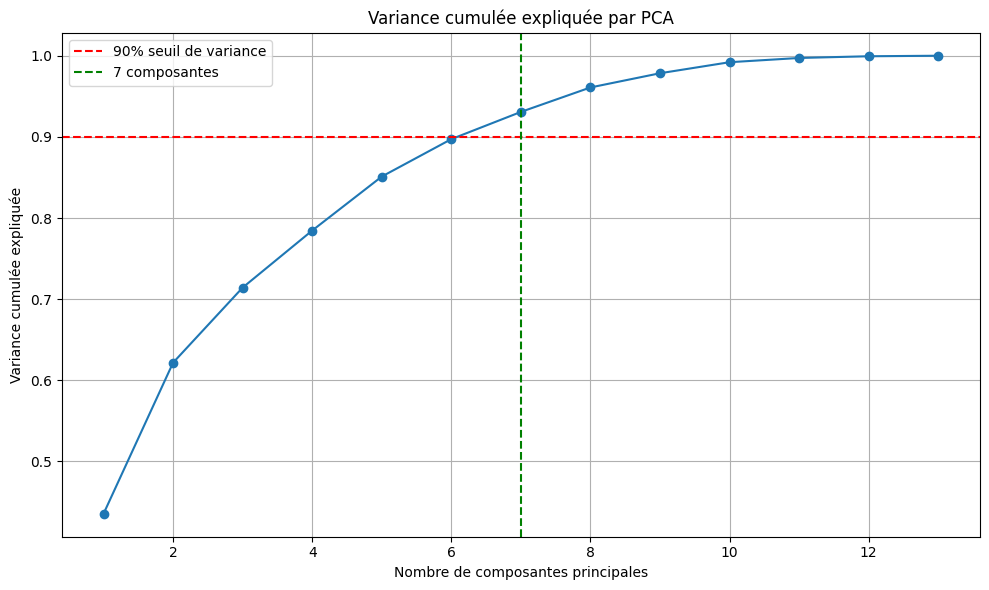

In [34]:

# Retirer la cible
X = train_df.drop(columns=target_column)  # modifie la cible si besoin

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA complète
pca = PCA()
pca.fit(X_scaled)

# Calcul de la variance cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Nombre optimal de composantes pour atteindre 90 %
threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f"Nombre optimal de composantes pour expliquer {threshold*100:.0f}% de la variance : {n_components}")

# Graphique explicatif
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{threshold*100:.0f}% seuil de variance')
plt.axvline(x=n_components, color='green', linestyle='--', label=f'{n_components} composantes')

plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée expliquée')
plt.title('Variance cumulée expliquée par PCA')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
# Effectuer la PCA avec le nombre optimal de composantes
pca_optimal = PCA(n_components=n_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# Créer un DataFrame avec toutes les composantes PCA obtenues
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_pca_optimal, columns=pca_columns)

# (Optionnel) Ajouter la colonne cible pour analyses futures
df_pca[target_column] = train_df[target_column].values

# Afficher un aperçu des nouvelles données issues de la PCA
print(df_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.557111 -0.977591  2.213902 -0.977851 -0.276447 -0.384002  0.238918   
1  3.187890 -1.609557  2.224680 -0.879451 -0.155092 -0.495567 -0.327086   
2  3.711545  4.177278  2.862443  0.193278 -0.080518  1.507844 -1.311881   
3  2.620770 -2.007534  2.225541  0.062002  0.976165 -0.833568 -0.374915   
4  3.600673  5.056355  2.476943  0.567188  0.668979  1.672629  0.968752   

   rainfall  
0         1  
1         1  
2         1  
3         1  
4         0  


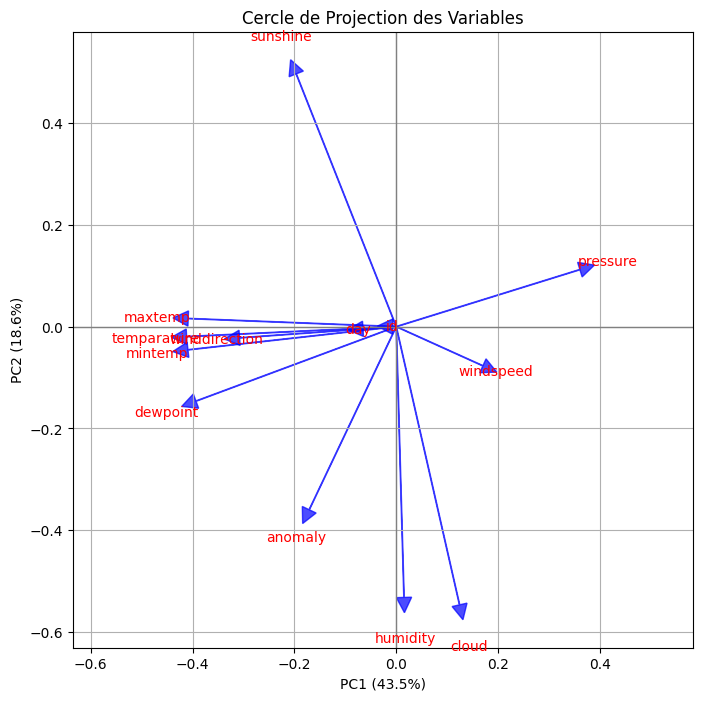

In [36]:
# Cercle de projection sur les 2 premières composantes
pcs = pca_optimal.components_

plt.figure(figsize=(8, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.arrow(0, 0, x, y, color='blue', alpha=0.7, head_width=0.03, head_length=0.03)
    plt.text(x * 1.15, y * 1.15, X.columns[i], color='red', ha='center', va='center')

# Cercle unité
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Cercle de Projection des Variables')
plt.grid(True)
plt.axis('equal')
plt.show()


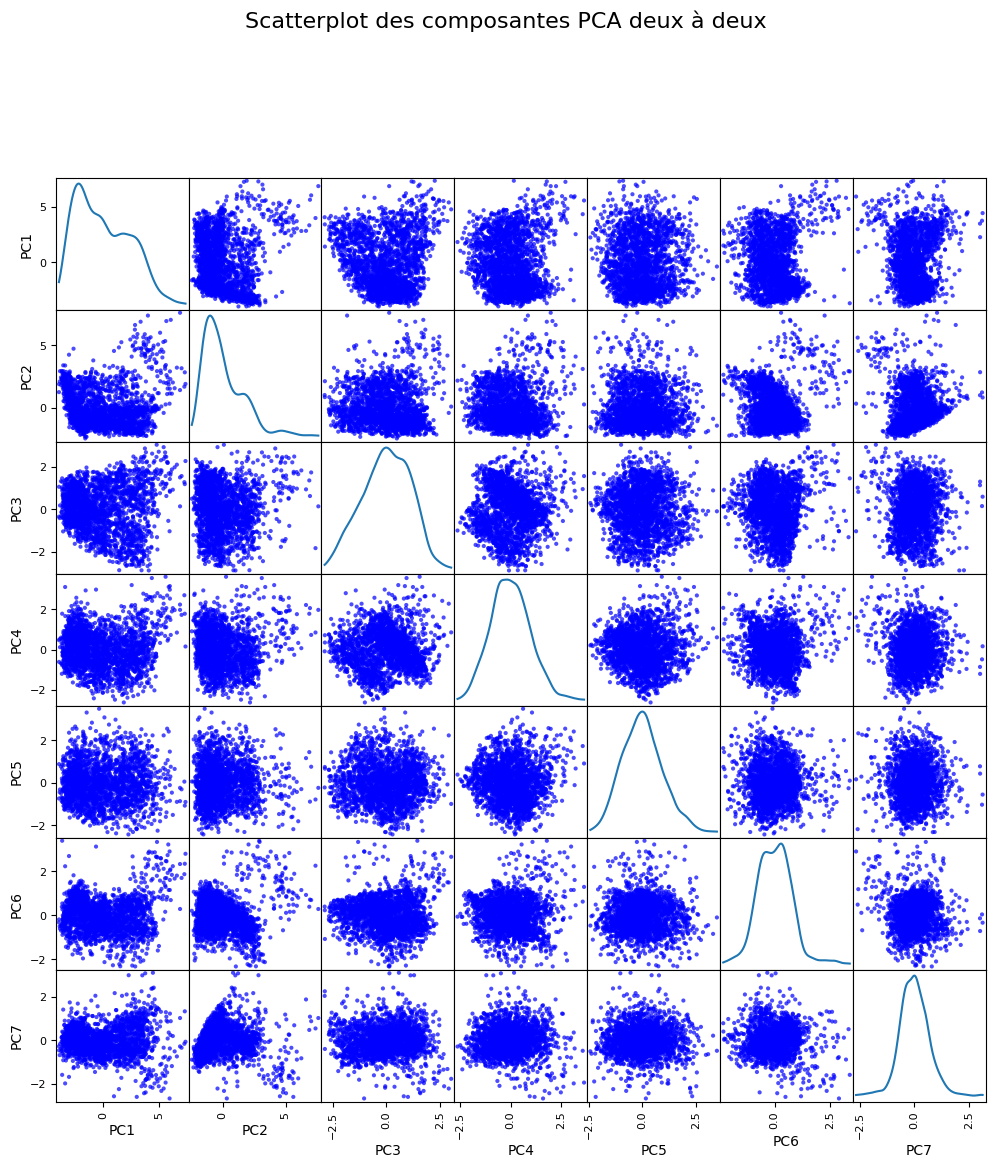

In [37]:
# Scatterplot en grille des composantes PCA deux à deux
pd.plotting.scatter_matrix(df_pca.drop(columns=[target_column]), 
                           figsize=(12, 12), 
                           diagonal='kde', 
                           alpha=0.7, 
                           c='blue')

plt.suptitle("Scatterplot des composantes PCA deux à deux", fontsize=16, y=1.02)
plt.show()


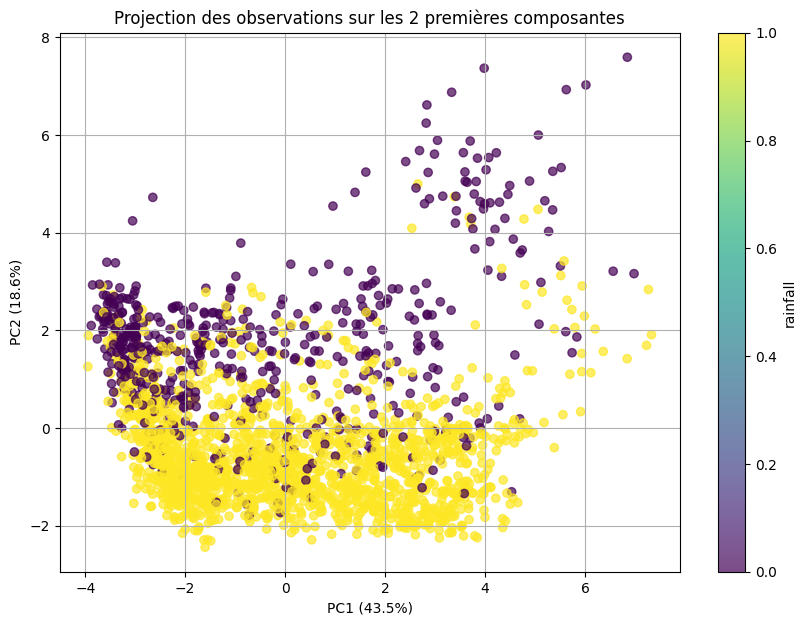

In [38]:
# Scatterplot des observations sur les 2 premières composantes
plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    X_pca_optimal[:, 0], X_pca_optimal[:, 1],
    c=train_df[target_column],  # colorer selon la cible (optionnel mais recommandé)
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=target_column)

plt.xlabel(f'PC1 ({pca_optimal.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_optimal.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Projection des observations sur les 2 premières composantes')
plt.grid(True)
plt.show()


In [39]:
from scipy.stats import zscore

# Calculer les Z-scores sur X
z_scores = np.abs(zscore(X))

# Filtrer les observations avec Z-score inférieur à un seuil (classiquement 3)
threshold_zscore = 3
mask = (z_scores < threshold_zscore).all(axis=1)

# Appliquer le masque sur X et y
X_no_outliers = X[mask]
y_no_outliers = train_df[target_column][mask]

print(f"Nombre d'observations supprimées : {len(X) - len(X_no_outliers)}")

Nombre d'observations supprimées : 135


In [40]:
# Nouvelle standardisation après suppression des outliers
X_scaled_no_outliers = scaler.fit_transform(X_no_outliers)

# PCA avec le nombre optimal précédemment déterminé
pca_no_outliers = PCA(n_components=n_components)
X_pca_no_outliers = pca_no_outliers.fit_transform(X_scaled_no_outliers)

# Nouveau DataFrame PCA sans outliers
df_pca_no_outliers = pd.DataFrame(X_pca_no_outliers, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca_no_outliers[target_column] = y_no_outliers.values

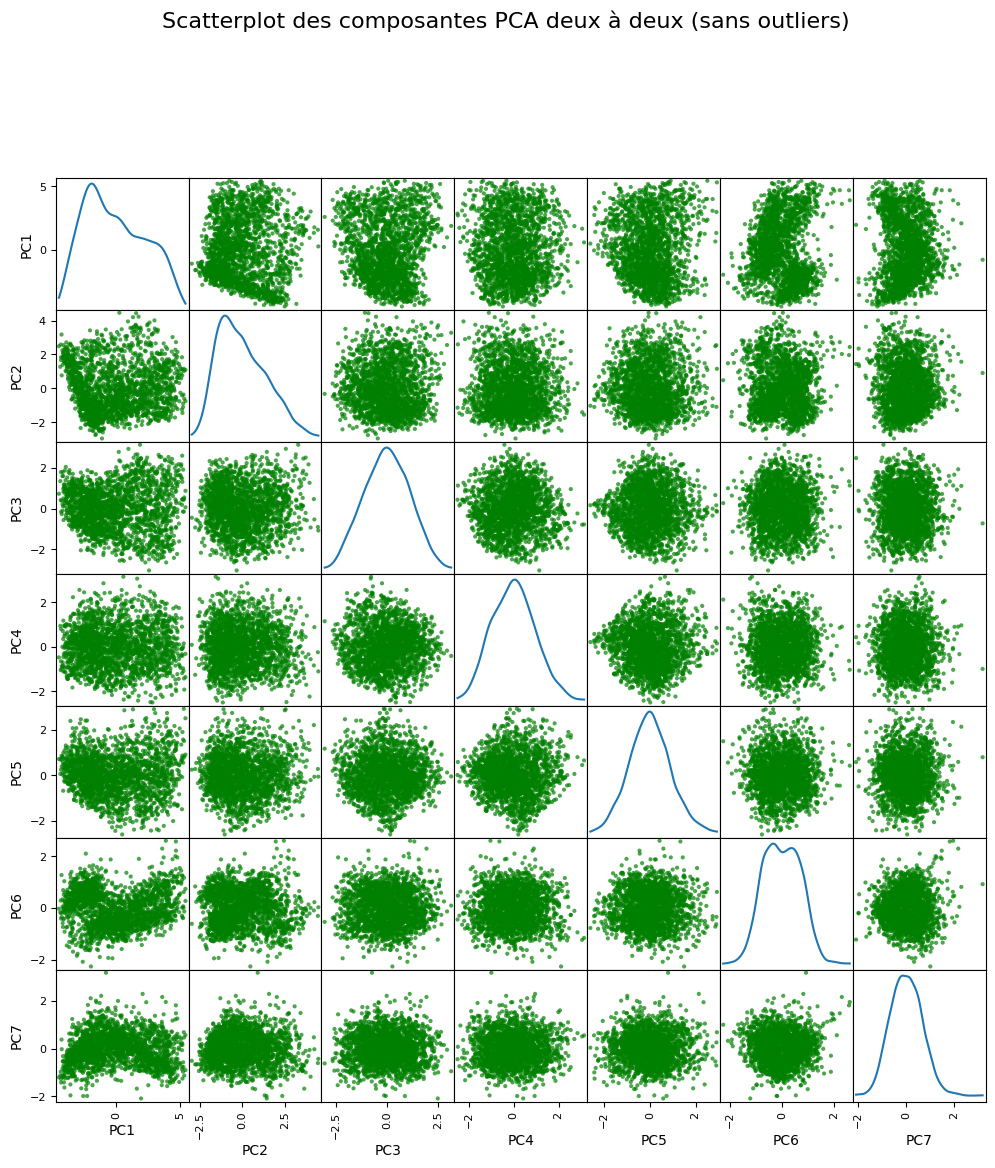

In [41]:
# Scatterplot en grille des composantes PCA deux à deux sans outliers
pd.plotting.scatter_matrix(df_pca_no_outliers.drop(columns=[target_column]),
                           figsize=(12, 12),
                           diagonal='kde',
                           alpha=0.7,
                           c='green')

plt.suptitle("Scatterplot des composantes PCA deux à deux (sans outliers)", fontsize=16, y=1.02)
plt.show()

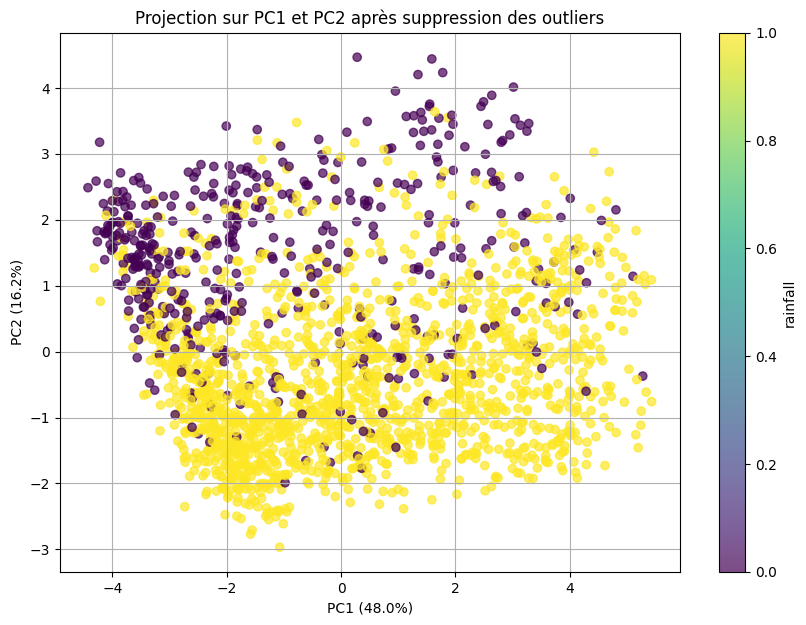

In [42]:
# Scatterplot des observations sur les deux premières composantes PCA sans outliers
plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    df_pca_no_outliers['PC1'], 
    df_pca_no_outliers['PC2'],
    c=df_pca_no_outliers[target_column],  # couleur selon la cible (optionnel mais conseillé)
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label=target_column)

plt.xlabel(f'PC1 ({pca_no_outliers.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca_no_outliers.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('Projection sur PC1 et PC2 après suppression des outliers')
plt.grid(True)
plt.show()

In [43]:

# Préparation des données (sans suppression des outliers)
X_full = train_df[numerical_columns]
y_full = train_df[target_column]

# Standardisation (recommandée pour la régression logistique)
scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Split train/test
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full_scaled, y_full, test_size=0.3, random_state=42
)

# Entraînement du modèle
logreg_full = LogisticRegression(max_iter=1000)
logreg_full.fit(X_train_full, y_train_full)

# Prédiction
y_pred_full = logreg_full.predict(X_test_full)

# Affichage des résultats
print("Résultats sur le jeu complet (SANS suppression d'outliers, SANS PCA) :")
print(classification_report(y_test_full, y_pred_full))
print(f"Accuracy : {accuracy_score(y_test_full, y_pred_full):.2%}")

Résultats sur le jeu complet (SANS suppression d'outliers, SANS PCA) :
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       167
           1       0.88      0.94      0.91       490

    accuracy                           0.86       657
   macro avg       0.84      0.79      0.81       657
weighted avg       0.86      0.86      0.86       657

Accuracy : 86.45%


In [44]:
# ---- Régression AVANT suppression d'outliers ----
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, train_df[target_column], test_size=0.3, random_state=42
)

logreg_original = LogisticRegression(max_iter=1000)
logreg_original.fit(X_train, y_train)
y_pred_original = logreg_original.predict(X_test)

print("Résultats AVANT suppression des outliers :")
print(classification_report(y_test, y_pred_original))
print(f"Accuracy : {accuracy_score(y_test, y_pred_original):.2%}\n")

# ---- Régression APRÈS suppression d'outliers (sur les composantes PCA) ----
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    df_pca_no_outliers.drop(columns=target_column),
    df_pca_no_outliers[target_column],
    test_size=0.3, random_state=42
)

logreg_no_outliers = LogisticRegression(max_iter=1000)
logreg_no_outliers.fit(X_train_no, y_train_no)
y_pred_no = logreg_no_outliers.predict(X_test_no)

print("Résultats APRÈS suppression des outliers (sur composantes PCA) :")
print(classification_report(y_test_no, y_pred_no))
print(f"Accuracy : {accuracy_score(y_test_no, y_pred_no):.2%}")


Résultats AVANT suppression des outliers :
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       167
           1       0.89      0.94      0.91       490

    accuracy                           0.86       657
   macro avg       0.83      0.79      0.81       657
weighted avg       0.86      0.86      0.86       657

Accuracy : 86.30%

Résultats APRÈS suppression des outliers (sur composantes PCA) :
              precision    recall  f1-score   support

           0       0.68      0.59      0.63       122
           1       0.90      0.93      0.92       495

    accuracy                           0.86       617
   macro avg       0.79      0.76      0.77       617
weighted avg       0.86      0.86      0.86       617

Accuracy : 86.39%


In [45]:
def date(df):
    df['day_sin'] = np.sin(2 * np.pi * df['day'] / 365)  
    df['day_cos'] = np.cos(2 * np.pi * df['day'] / 365)
    return df

# Apply the date function to both datasets
train_df = date(train_df)
test_df = date(test_df)

<div style="background-color:purple; color:white; padding:10px; border-radius:5px;">
    📊 Dataset Overview
</div>
